# Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG

## TCC turma 2020 - Gabriel Fonseca da Silva


### Objetivo: desenvolver um algoritmo de machine learning para prever a aprovação de um candidato na prova do ENCCEJA 2019 para obtenção do certificado do ensino fundamental

## Dados utilizados:

### a) Microdados do ENCCEJA Nacional Regular 2019 dos inscritos que fizeram as provas do ensino fundamental

##### https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/encceja

### b) Dados de homicídios por UF do ano de 2019 extraídos do DATASUS (grupo CID10 X85-Y09 e Y35-Y36)
#### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/ext10uf.def

### c) População por UF estimada extraída do DATASUS (estimativas utilizadas pelo TCU)
#### http://tabnet.datasus.gov.br/cgi/tabcgi.exe?ibge/cnv/poptuf.def

### d) Índice de Desenvolvimeno Humano por Estado extraído do Atlas Brasil do IPEA
#### http://www.atlasbrasil.org.br/



## Aplicação: Regressão Logística

### 1) Importando bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from joblib import dump, load
import os

import warnings
warnings.filterwarnings("ignore")

### 2) Carregando os dados após a transformação dos dados

In [2]:
# Importando os dados 

dados = pd.read_csv("05-dados_transformados\dados_dummies.csv", sep = ',', encoding = "ISO-8859-1")

print("\nDimensões: {0}".format(dados.shape))
print("\nCampos: {0}".format(dados.keys()))


Dimensões: (144757, 41)

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_B-Até 1 SM', 'renda_propria_C-Mais de 1 SM',
       'trabalha_A-Sim', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'serie_estudo_B-5ª série',
       'serie_estudo_C-6ª série', 'serie_estudo_D-7ª série',
       'serie_estudo_E-8ª série', 'idade_estudo_B-Menos de 15 anos',
       'idade_estudo_C-Entre 15 e 18 anos', 'idade_estudo_D-Mais de

#### 2.1) Separando dados em treino e teste

In [3]:
# Separando os atributos e o target

## Número de atributos 

k=dados.shape[1]-1


## Selecionando os atributos

X = dados.iloc[:,0:k]


# Selecionando o target

y = dados.iloc[:,k]


# Visualizando o nome dos atributos

print("\nDimensões: {0}".format(X.shape))
print('Nomes dos atributos de X: ')
print("\nCampos: {0}".format(X.keys()))



Dimensões: (144757, 40)
Nomes dos atributos de X: 

Campos: Index(['genero_Feminino', 'moradia_pessoas_A-Até 3 pessoas',
       'moradia_tipo_A-Própria', 'moradia_local_B-Zona urbana',
       'escolaridade_pai_B-Antigo primário',
       'escolaridade_pai_C-Antigo ginásio',
       'escolaridade_pai_D-Médio/Superior/especialização',
       'escolaridade_mae_B-Antigo primário',
       'escolaridade_mae_C-Antigo ginásio',
       'escolaridade_mae_D-Médio/Superior/especialização',
       'renda_propria_B-Até 1 SM', 'renda_propria_C-Mais de 1 SM',
       'trabalha_A-Sim', 'reprovou_B-Uma vez', 'reprovou_C-Duas vezes',
       'reprovou_D-Três vezes ou mais', 'motivo_estudo_A-Conseguir um emprego',
       'motivo_estudo_B-Conseguir um emprego melhor',
       'motivo_estudo_C-Adquirir conhecimento', 'serie_estudo_B-5ª série',
       'serie_estudo_C-6ª série', 'serie_estudo_D-7ª série',
       'serie_estudo_E-8ª série', 'idade_estudo_B-Menos de 15 anos',
       'idade_estudo_C-Entre 15 e 18 ano

In [4]:
# Separando dados de treino e de teste

seed = 7

# Criando os conjuntos de dados de treino e de teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.30, random_state = seed)

print("\nDimensões X_treino: {0}".format(X_treino.shape))
print("\nDimensões y_treino: {0}".format(y_treino.shape))
print("\nDimensões X_teste:  {0}".format(X_teste.shape))
print("\nDimensões y_teste:  {0}".format(y_teste.shape))


Dimensões X_treino: (101329, 40)

Dimensões y_treino: (101329,)

Dimensões X_teste:  (43428, 40)

Dimensões y_teste:  (43428,)


#### 2.3) Verificando a existência de desbalanceamento das classes


Distribuição dos dados de treino referentes aos aprovados 
 
0 - Não e 1 - Sim 

0    56494
1    44835
Name: target_Aprovado, dtype: int64

Aprovados são 44.2% dos dados de treino.



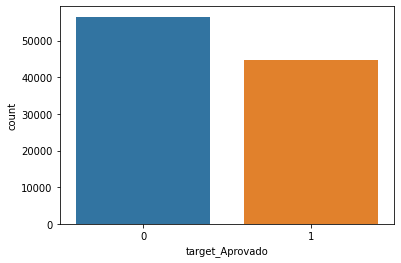

In [5]:
# Checando o balanceamento das classes

y0 = y_treino

print("\nDistribuição dos dados de treino referentes aos aprovados \n \n0 - Não e 1 - Sim \n")
print(y0.value_counts())
print("\nAprovados são {:.1f}% dos dados de treino.\n".format((y0[y0 == 1].shape[0] / y0.shape[0]) * 100))

sns.countplot(y0);

### 3) Gerando o modelo Logit utilizando o Scikit-Learn

#### 3.1) Gerando o modelo Logit sem cross-validation

Coeficientes do modelo: 
 
 [-1.76694587] [[-0.13889526  0.05149802 -0.1358392   0.14966408  0.06030045  0.02549101
   0.28321721  0.20116392  0.26309069  0.4707462  -0.11896977  0.13836373
   0.16739008 -0.09788095 -0.21254874 -0.30788454 -0.00870377  0.0688242
   0.15065883  0.23640048  0.50911338  0.65242531  0.85075669  0.27839536
   0.23331765 -0.06563486  0.03670144  0.54762016  0.70872313  0.66334246
  -0.07582235 -0.0285782  -0.13575843  0.13261276  0.16213881  0.15332466
   0.07537682  0.23089649  0.33869119  0.34693701]]

 Acurácia: 0.6109

 Relatório: 

              precision    recall  f1-score   support

           0       0.67      0.60      0.64     24404
           1       0.55      0.62      0.58     19024

    accuracy                           0.61     43428
   macro avg       0.61      0.61      0.61     43428
weighted avg       0.62      0.61      0.61     43428


 Matriz de confusão: 
                Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não            

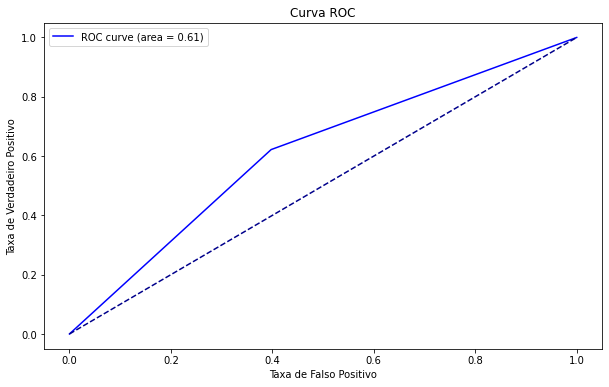

In [6]:
# Gerando o modelo de regressão logística

X0 = X_treino
y0 = y_treino


logit = LogisticRegression(penalty='none', random_state = seed, solver='newton-cg', class_weight='balanced',  
                           fit_intercept=True).fit(X0, y0)


# Extraindo os coeficientes do modelo

intercepto = logit.intercept_
coeficientes = logit.coef_

print('Coeficientes do modelo: \n \n', intercepto, coeficientes)


# Acurácia do modelo

y_pred = logit.predict(X_teste)

print('\n Acurácia: %0.4f' % accuracy_score(y_teste, y_pred))

print("\n Relatório: \n")
print(classification_report(y_teste, y_pred))


# Matriz de confusão

cnf_matrix = confusion_matrix(y_teste, y_pred)

cnf_table = pd.DataFrame(data=cnf_matrix, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])


print("\n Matriz de confusão: \n ", cnf_table)


# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y_teste, y_pred))

def plot_roc_curve(y_teste, y_pred, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_teste, y_pred)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_teste, y_pred)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y_teste, y_pred)    

In [7]:
# Criando tabela com os valores dos coeficientes do modelo

## Extraindo os nomes dos atributos

nomes=pd.DataFrame(X0.keys())
nomes.rename(columns={0: 'Atributos'}, inplace = True)
nomes.loc[-1] = ['Intercepto']  
nomes.index = nomes.index + 1  
nomes = nomes.sort_index()
nomes=nomes.reset_index()

## Valores dos coeficientes

betas = pd.DataFrame(data=coeficientes).T
betas.rename(columns={0: 'betas'}, inplace = True)
betas.loc[-1] = intercepto  
betas.index = betas.index + 1  
betas = betas.sort_index()
betas=betas.reset_index()

## Tabela

tabela_coef = pd.merge(nomes,betas, on = 'index')
tabela_coef.to_excel('tabelas/coeficientes_logit1.xlsx',index=True,index_label='id')
del tabela_coef['index']


## Calculando a odds ratio (razão de chances)

tabela_coef['razao_chances']=np.exp(tabela_coef['betas'])


print('Coeficientes do modelo: \n' )

tabela_coef

Coeficientes do modelo: 



Atributos     betas  razao_chances
0                                         Intercepto -1.766946       0.170854
1                                    genero_Feminino -0.138895       0.870319
2                    moradia_pessoas_A-Até 3 pessoas  0.051498       1.052847
3                             moradia_tipo_A-Própria -0.135839       0.872983
4                        moradia_local_B-Zona urbana  0.149664       1.161444
5                 escolaridade_pai_B-Antigo primário  0.060300       1.062156
6                  escolaridade_pai_C-Antigo ginásio  0.025491       1.025819
7   escolaridade_pai_D-Médio/Superior/especialização  0.283217       1.327393
8                 escolaridade_mae_B-Antigo primário  0.201164       1.222825
9                  escolaridade_mae_C-Antigo ginásio  0.263091       1.300945
10  escolaridade_mae_D-Médio/Superior/especialização  0.470746       1.601189
11                          renda_propria_B-Até 1 SM -0.118970       0.887835
12                      renda_propria_C-Mais de 1 SM  0.138364       1.148393
13                                    trabalha_A-Sim  0.167390       1.182215
14                                reprovou_B-Uma vez -0.097881       0.906757
15                             reprovou_C-Duas vezes -0.212549       0.808521
16                     reprovou_D-Três vezes ou mais -0.307885       0.735000
17              motivo_estudo_A-Conseguir um emprego -0.008704       0.991334
18       motivo_estudo_B-Conseguir um emprego melhor  0.068824       1.071248
19             motivo_estudo_C-Adquirir conhecimento  0.150659       1.162600
20                           serie_estudo_B-5ª série  0.236400       1.266681
21                           serie_estudo_C-6ª série  0.509113       1.663815
22                           serie_estudo_D-7ª série  0.652425       1.920192
23                           serie_estudo_E-8ª série  0.850757       2.341418
24                   idade_estudo_B-Menos de 15 anos  0.278395       1.321008
25                 idade_estudo_C-Entre 15 e 18 anos  0.233318       1.262783
26                    idade_estudo_D-Mais de 18 anos -0.065635       0.936473
27                                         eja_A-Sim  0.036701       1.037383
28                         faixa_etaria_B-De 21 a 30  0.547620       1.729133
29                         faixa_etaria_C-De 31 a 41  0.708723       2.031396
30                          faixa_etaria_D-42 e mais  0.663342       1.941270
31            taxa_homicidios_B-Acima de 13,7 a 18,3 -0.075822       0.926981
32            taxa_homicidios_C-Acima de 18,3 a 25,9 -0.028578       0.971826
33                   taxa_homicidios_D-Acima de 25,9 -0.135758       0.873054
34                     idhm_B-Acima de 0,766 a 0,787  0.132613       1.141808
35                     idhm_C-Acima de 0,787 a 0,796  0.162139       1.176023
36                             idhm_D-Acima de 0,796  0.153325       1.165703
37                               regiao_Centro-oeste  0.075377       1.078290
38                                   regiao_Nordeste  0.230896       1.259729
39                                    regiao_Sudeste  0.338691       1.403110
40                                        regiao_Sul  0.346937       1.414728

#### 3.2) Gerando o modelo Logit com cross-validation

Coeficientes do modelo: 
 
 [-1.8069074] [[-0.13133496  0.04904046 -0.13051176  0.15583387  0.05139597  0.03028791
   0.2975235   0.18457798  0.25630756  0.45788794 -0.10455598  0.15356929
   0.17759988 -0.09405294 -0.21236542 -0.30666654  0.00725728  0.05501077
   0.16346824  0.24199191  0.5007208   0.67036171  0.8693927   0.30143556
   0.24424566 -0.0542269   0.03925488  0.54752533  0.71829963  0.67106007
  -0.07902788 -0.03172508 -0.14495815  0.11441755  0.1378431   0.13116776
   0.09454018  0.22138971  0.35368545  0.36000464]]

 Acurácia: 0.6094

 Relatório: 

              precision    recall  f1-score   support

           0       0.67      0.60      0.63     80898
           1       0.55      0.63      0.59     63859

    accuracy                           0.61    144757
   macro avg       0.61      0.61      0.61    144757
weighted avg       0.62      0.61      0.61    144757


 Matriz de confusão: 
                Aprovado(prev)=Não  Aprovado(prev)=Sim
Aprovado=Não            

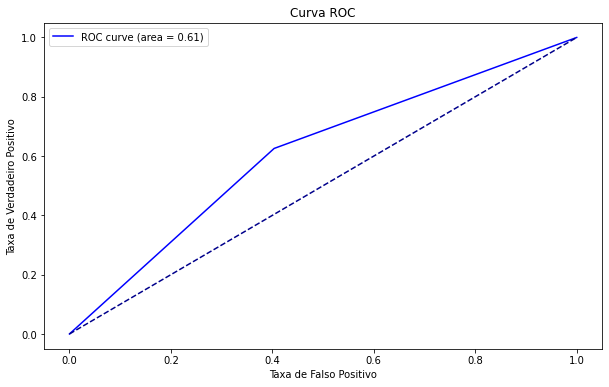

In [8]:
# Separando os dados em 10 blocos e utilizando o mesmo seed

blocos = KFold(10, True, random_state = seed)


# Criando o modelo logístico com cross-validation

logit_cv = LogisticRegressionCV(cv = blocos, random_state = seed, solver='newton-cg', fit_intercept=True,
                              class_weight='balanced').fit(X, y)


# Extraindo os coeficientes do modelo

intercepto_cv = logit_cv.intercept_
coeficientes_cv = logit_cv.coef_

print('Coeficientes do modelo: \n \n', intercepto_cv, coeficientes_cv)


# Acurácia do modelo

y_pred_cv = logit_cv.predict(X)


print('\n Acurácia: %0.4f' % accuracy_score(y, y_pred_cv))

print("\n Relatório: \n")
print(classification_report(y, y_pred_cv))


# Matriz de confusão

cnf_matrix_cv = confusion_matrix(y, y_pred_cv)
cnf_table_cv = pd.DataFrame(data=cnf_matrix, index=["Aprovado=Não", "Aprovado=Sim"], 
                         columns=["Aprovado(prev)=Não", "Aprovado(prev)=Sim"])

print("\n Matriz de confusão: \n ", cnf_table_cv)


# Curva ROC

print('\n Área abaixo da curva - AUC: %0.4f' % roc_auc_score(y, y_pred_cv))

def plot_roc_curve(y_teste, y_pred_cv, figsize=(10,6)):
    fpr_cv, tpr_cv, _ = roc_curve(y, y_pred_cv)
    plt.figure(figsize=figsize)
    auc_value_cv = roc_auc_score(y, y_pred_cv)
    plt.plot(fpr_cv, tpr_cv, color='blue', label='ROC curve (area = %0.2f)' % auc_value_cv)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
plot_roc_curve(y, y_pred_cv)

In [9]:
# Criando tabela com os valores dos coeficientes_cv do modelo

## Extraindo os nomes_cv dos atributos

nomes_cv=pd.DataFrame(X.keys())
nomes_cv.rename(columns={0: 'Atributos'}, inplace = True)
nomes_cv.loc[-1] = ['Intercepto']  
nomes_cv.index = nomes_cv.index + 1  
nomes_cv = nomes_cv.sort_index()
nomes_cv=nomes_cv.reset_index()

## Valores dos coeficientes_cv

betas_cv = pd.DataFrame(data=coeficientes_cv).T
betas_cv.rename(columns={0: 'betas_cv'}, inplace = True)
betas_cv.loc[-1] = intercepto_cv  
betas_cv.index = betas_cv.index + 1  
betas_cv = betas_cv.sort_index()
betas_cv=betas_cv.reset_index()

## Tabela

tabela_coef_cv = pd.merge(nomes_cv,betas_cv, on = 'index')
tabela_coef_cv.to_excel('tabelas/coeficientes_logitcv.xlsx',index=True,index_label='id')
del tabela_coef_cv['index']


## Calculando a odds ratio (razão de chances)

tabela_coef_cv['razao_chances']=np.exp(tabela_coef_cv['betas_cv'])


print('Coeficientes do modelo: \n' )

tabela_coef_cv

Coeficientes do modelo: 



Atributos  betas_cv  razao_chances
0                                         Intercepto -1.806907       0.164161
1                                    genero_Feminino -0.131335       0.876924
2                    moradia_pessoas_A-Até 3 pessoas  0.049040       1.050263
3                             moradia_tipo_A-Própria -0.130512       0.877646
4                        moradia_local_B-Zona urbana  0.155834       1.168632
5                 escolaridade_pai_B-Antigo primário  0.051396       1.052740
6                  escolaridade_pai_C-Antigo ginásio  0.030288       1.030751
7   escolaridade_pai_D-Médio/Superior/especialização  0.297523       1.346520
8                 escolaridade_mae_B-Antigo primário  0.184578       1.202711
9                  escolaridade_mae_C-Antigo ginásio  0.256308       1.292150
10  escolaridade_mae_D-Médio/Superior/especialização  0.457888       1.580732
11                          renda_propria_B-Até 1 SM -0.104556       0.900724
12                      renda_propria_C-Mais de 1 SM  0.153569       1.165989
13                                    trabalha_A-Sim  0.177600       1.194347
14                                reprovou_B-Uma vez -0.094053       0.910235
15                             reprovou_C-Duas vezes -0.212365       0.808669
16                     reprovou_D-Três vezes ou mais -0.306667       0.735896
17              motivo_estudo_A-Conseguir um emprego  0.007257       1.007284
18       motivo_estudo_B-Conseguir um emprego melhor  0.055011       1.056552
19             motivo_estudo_C-Adquirir conhecimento  0.163468       1.177588
20                           serie_estudo_B-5ª série  0.241992       1.273784
21                           serie_estudo_C-6ª série  0.500721       1.649910
22                           serie_estudo_D-7ª série  0.670362       1.954944
23                           serie_estudo_E-8ª série  0.869393       2.385462
24                   idade_estudo_B-Menos de 15 anos  0.301436       1.351798
25                 idade_estudo_C-Entre 15 e 18 anos  0.244246       1.276658
26                    idade_estudo_D-Mais de 18 anos -0.054227       0.947217
27                                         eja_A-Sim  0.039255       1.040036
28                         faixa_etaria_B-De 21 a 30  0.547525       1.728969
29                         faixa_etaria_C-De 31 a 41  0.718300       2.050943
30                          faixa_etaria_D-42 e mais  0.671060       1.956310
31            taxa_homicidios_B-Acima de 13,7 a 18,3 -0.079028       0.924014
32            taxa_homicidios_C-Acima de 18,3 a 25,9 -0.031725       0.968773
33                   taxa_homicidios_D-Acima de 25,9 -0.144958       0.865058
34                     idhm_B-Acima de 0,766 a 0,787  0.114418       1.121220
35                     idhm_C-Acima de 0,787 a 0,796  0.137843       1.147795
36                             idhm_D-Acima de 0,796  0.131168       1.140159
37                               regiao_Centro-oeste  0.094540       1.099153
38                                   regiao_Nordeste  0.221390       1.247810
39                                    regiao_Sudeste  0.353685       1.424307
40                                        regiao_Sul  0.360005       1.433336

### 4) Salvando os modelos gerados


In [10]:
# Alterando o diretório dos dados

os.chdir("06-modelos")


# Salvando o modelo logit

dump(logit, 'modelo_logit.joblib')


# Salvando o modelo logit com Cross-Validation

dump(logit_cv, 'modelo_logitcrossvalid.joblib') 


['modelo_logitcrossvalid.joblib']